# Dataset Scoring Justifications - Query & Visualization

This notebook demonstrates how to query and visualize EO dataset scores from the `scoring_justifications.parquet` file hosted in the [NestEO Prototype Hugging Face dataset repository](https://huggingface.co/datasets/nesteo-datasets/nesteo-prototype).

The file contains refined, grounded scoring justifications for 15 prominent EO datasets across 36 sub-criteria grouped into 6 main criteria (diversity, framework, modalities, accessibility, auxiliary data, benchmarking).

We will load this file and explore:
- Dataset scores across criteria or sub-criteria.
- Comparative heatmaps of scores across datasets and sub-criteria.

It allows:
- Viewing and filtering by dataset name
- Searching by evaluation criteria or sub-criteria
- Displaying the full justifications for selected entries
- Visualizing scores as a heatmap matrix


In [1]:
# !pip install -q pandas pyarrow seaborn matplotlib datasets

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
# Load from Hugging Face Hub
from huggingface_hub import hf_hub_download
import pandas as pd

# Download the specific parquet file from the HF dataset repo
file_path = hf_hub_download(
    repo_id="nesteo-datasets/nesteo-prototype",
    filename="evaluations/scoring_justifications.parquet",
    repo_type="dataset"
)

# Load into pandas
df = pd.read_parquet(file_path)
df.head()



scoring_justifications.parquet:   0%|          | 0.00/76.5k [00:00<?, ?B/s]

c:\ProgramData\miniconda3\envs\PytKerasNewHQ\Lib\site-packages\huggingface_hub\file_download.py:149: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\RYZEN\.cache\huggingface\hub\datasets--nesteo-datasets--nesteo-prototype. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to see activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


,No,Dataset,Criteria,Sub-Criteria,Label,Score,Brief Justification & Explanation
0,1,Sen12MS,"Diversity, Biases & Coverage Proportions",Geographic diversity,1.1.Geographic diversity,2.5,"The dataset samples 180,662 image pairs from g..."
1,1,Sen12MS,"Diversity, Biases & Coverage Proportions","Biomes, Landcovers","1.2.Biomes, Landcovers",3.0,Land cover labels are derived from MODIS IGBP ...
2,1,Sen12MS,"Diversity, Biases & Coverage Proportions",Climate zones,1.3.Climates,3.0,The dataset spans multiple seasons and include...
3,1,Sen12MS,"Diversity, Biases & Coverage Proportions",Human activity,1.4.Human Activity Zones,3.0,The dataset includes a mix of urban and non-ur...
4,1,Sen12MS,"Diversity, Biases & Coverage Proportions",Major EO Themes,1.5.Major EO Themes,2.5,\tThe dataset is primarily designed for land-c...


## Dataset Summary

The scoring justifications include the following key columns:

- **Dataset**: The dataset name (e.g., Sen12MS, WorldStrat, Major-TOM)
- **Criteria**: One of the six major dimensions of evaluation
- **Sub-Criteria**: Specific measurable sub-aspects (e.g., 'Geographic Diversity')
- **Label**: Unique identifier for each sub-criteria (e.g., 1.1.Geographic Diversity)
- **Score**: Final Likert-style score assigned (0–5)
- **Brief Justification & Explanation**: A concise, grounded rationale for each score

You can group, filter, and visualize this structure flexibly.


In [3]:
# Show unique dataset names and criteria
print("Datasets available:", df["Dataset"].unique())
print("\nEvaluation Criteria:", df["Criteria"].unique())
print("\nSub-Criteria Examples:", df["Sub-Criteria"].unique())#[:10])


Datasets available: ['Sen12MS' 'fMoW' 'OpenSentinelMap' 'RapidAI4EO' 'SeCo' 'SSL4EO-S12v1.1'
 'SSL4EO-L' 'WorldStrat' 'SeeFar' 'MMEarth' 'BigEarthNetv2' 'Satlas'
 'Major-TOM' 'Earthview' 'Copernicus']

Evaluation Criteria: ['Diversity, Biases & Coverage Proportions'
 'Base Framework and Sampling Strategies'
 'Multi-Modality and Multi-Dimensionality'
 'Accessibility and Extensibility' 'Auxiliary Data and Cross-Integration'
 'Benchmarking & Pretrained Models']

Sub-Criteria Examples: ['Geographic diversity' 'Biomes, Landcovers' 'Climate zones'
 'Human activity' 'Major EO Themes' 'Grid Structure'
 'Resolution Compatibility' 'Reproducibility'
 'Extension Scalability/Integrity' 'Sampling method'
 'Sampling Attributes Used' 'Spectral Diversity' 'Resolution Diversity'
 'Temporal Granularity' 'Multi-Platform Integration'
 'Multi-Source Alignment' 'Vision-Language Intergation'
 'Synthetic Data Inclusion' 'Spatial Fidelity' 'Spectral Fidelity'
 'Imaging Conditions' 'Access format' 'Access method

In [10]:
# Filter by dataset name (e.g., "Earthview")
selected_dataset = "Major-TOM"
df_filtered = df[df["Dataset"] == selected_dataset].sort_values("Label")
df_filtered[["Label", "Score", "Brief Justification & Explanation"]].style.set_properties(
    subset=["Brief Justification & Explanation"],
    **{'white-space': 'pre-wrap'}
)


,Label,Score,Brief Justification & Explanation
432,1.1.Geographic diversity,3.000000,"Major-TOM offers truly global coverage through a uniform grid. It includes most terrestrial and oceanic regions. However, while spatially expansive, its sampling density per location is limited. No regional oversampling or revisit logic ensures dense representation in specific zones (e.g., urban cores, ecological hotspots), and polar extremes remain sparse. There is too much outside regions coverage"
433,"1.2.Biomes, Landcovers",3.500000,"The sampling is not explicitly stratified across land cover classes, leading to uneven representation. While the dataset indirectly spans global biomes (via geospatial uniformity), the lack of land cover-aware balancing results in overrepresentation of open ocean and underrepresentation of fragile biomes like wetlands, tundra, or mangroves. A substantial portion (~33%) is ocean or open seapixels."
434,1.3.Climates,4.000000,"While there is general global coverage, the dataset was not specifically designed to ensure balanced climate zone representation. Also, a major chunk of the dataset again is devoted to seas. Its distribution runs across multiple climate zones but leaves some of the far cold categories in minimal proportions. Has 31 nonzero classes and does include a polar share, thus covering all major zones. The spread (21 ≥1%, 4 ≥10%) is broad but not close enough to real‐world proportions for a “5.”"
435,1.4.Human Activity Zones,3.000000,"Built-up and infrastructure-heavy regions are present but not targeted. The lack of anthropogenic stratification or human-centric sampling leads to moderate underrepresentation of highly urbanized, industrial, or informal settlements. However, the large-scale uniform sampling ensures incidental inclusion of diverse human activity types."
436,1.5.Major EO Themes,3.500000,"The dataset covers multiple EO themes, including land, seas and ice but no atmospheric datasets or human activities are under-represented proportionally."
437,2.1.Grid Structure,4.000000,"The dataset is designed for multi-scale expansion with a structured grid creation that ensures spatial coherence. The grid-based system improves alignment compared to many prior datasets. The only missing concept is the current single level datasets. Single equal-distance (≈10 km) geodesic grid—uniform but not hierarchical/nested. The current design lacks hierarchical nesting (e.g., no sub-1km or >20km tiles), but its structural rigor is superior to datasets based on irregular or point-based sampling."
438,2.2.Resolution Compatibility,4.000000,"Uses a structured, uniform grid (10 km spacing) that ensures consistency across data sources, but the scale at which the current data is released is not entirely sutiable for 10m resolution or finer resolution datasets/most models. That is why embeddings are released at smaller levels within the 10km cells. A single level large grid cells are currently provided. 1 068 × 1 068 px patches align 10 m, 20 m, 60 m Sentinel-2 bands pixel-perfect; DEM 30 m & S1 RTC re-projected to same footprint."
439,2.3.Reproducibility,4.500000,"Major TOM explicitly defines reproducible grid structures and metadata standards, ensuring consistency and ease of reusability. The framework computation is accessible and can be derived based on the code for a specific AOI plus is extensible to other levels. It is computationally most accessible to derive among the datasets ."
440,2.4.ExtensionScalability/Integrity,4.000000,"Designed as an expandable framework, allowing additional datasets and sensors to be added in a strucuted manner, how no current integrity rules are enforced in adding new samples in terms of maintaining balance across lc, biomes, regions etc. Framework explicitly designed for community additions; grid plug-in compatibility. The dataset is designed for plug-in extensibility (new sensors, grid levels, metadata layers). However, there’s currently no governance mechanism to maintain themat

In [5]:
# Find all rows where Sub-Criteria contains a keyword
keyword = "Embedding"
df_keyword = df[df["Sub-Criteria"].str.contains(keyword, case=False, na=False)]
df_keyword[["Dataset", "Label", "Score", "Brief Justification & Explanation"]].style.set_properties(
    subset=["Brief Justification & Explanation"],
    **{'white-space': 'pre-wrap'}
)


,Dataset,Label,Score,Brief Justification & Explanation
31,Sen12MS,5.4.Embeddings,1.000000,No precomputed feature embeddings or intermediate representations are provided for any sensor or patch.
67,fMoW,5.4.Embeddings,1.000000,"No precomputed visual or semantic embeddings are released with the dataset, though baseline models exist."
103,OpenSentinelMap,5.4.Embeddings,1.500000,"Some pretrained embeddings have been used with this dataset in downstream work, but no official or comprehensive set of embeddings is included as part of the dataset release."
139,RapidAI4EO,5.4.Embeddings,1.000000,No precomputed embeddings or intermediate representations are provided. Users must process the raw imagery to derive features or train encoders
175,SeCo,5.4.Embeddings,2.500000,SeCo releases self-supervised feature embeddings trained with MoCo-v2 and SeCo-specific SSL objectives. These embeddings are useful for downstream tasks and are a key contribution of the dataset.
211,SSL4EO-S12v1.1,5.4.Embeddings,2.000000,"Pretrained embeddings from models like MoCo-v2 are available for downstream use. These are valuable, though limited to a few checkpoints and without embedding metadata or visualizations."
247,SSL4EO-L,5.4.Embeddings,1.000000,No explicit mention of precomputed embeddings. Users can generate their own using the pre-trained models provided.
283,WorldStrat,5.4.Embeddings,1.000000,No pretrained feature embeddings or latent representations are released. Users must generate their own features using the raw imagery.
319,SeeFar,5.4.Embeddings,1.000000,"No precomputed feature embeddings, semantic vectors, or learned representations are provided with the dataset."
355,MMEarth,5.4.Embeddings,1.000000,"No precomputed embeddings, representations, or feature maps are provided with the dataset. Users must train from scratch."


In [6]:
# Average score per dataset
df.groupby("Dataset")["Score"].mean().sort_values(ascending=False)


Dataset
Satlas             3.263889
Major-TOM          3.180556
Earthview          3.152778
Copernicus         3.125000
SSL4EO-S12v1.1     2.888889
fMoW               2.875000
MMEarth            2.805556
RapidAI4EO         2.805556
WorldStrat         2.763889
OpenSentinelMap    2.527778
SSL4EO-L           2.513889
BigEarthNetv2      2.375000
SeCo               2.347222
Sen12MS            2.305556
SeeFar             2.097222
Name: Score, dtype: float64

In [9]:
# All sub-criteria scores for a given dataset
df[df["Dataset"] == "Major-TOM"].sort_values("Label")[["Label", "Score"]]


,Label,Score
432,1.1.Geographic diversity,3.0
433,"1.2.Biomes, Landcovers",3.5
434,1.3.Climates,4.0
435,1.4.Human Activity Zones,3.0
436,1.5.Major EO Themes,3.5
437,2.1.Grid Structure,4.0
438,2.2.Resolution Compatibility,4.0
439,2.3.Reproducibility,4.5
440,2.4.ExtensionScalability/Integrity,4.0
441,2.5.Sampling method,2.5


In [11]:
# Compare scores of a specific sub-criteria across datasets
df[df["Label"] == "1.1.Geographic diversity"][["Dataset", "Score"]].sort_values("Score", ascending=False)


,Dataset,Score
216,SSL4EO-L,4.0
324,MMEarth,4.0
468,Earthview,4.0
504,Copernicus,4.0
180,SSL4EO-S12v1.1,3.5
252,WorldStrat,3.5
72,OpenSentinelMap,3.0
144,SeCo,3.0
396,Satlas,3.0
432,Major-TOM,3.0


## Heatmap: Dataset × Sub-Criteria Scores

This heatmap shows how each dataset performs across evaluation sub-criteria. The scores are on a 0–5 Likert scale, with darker colors indicating higher scores.


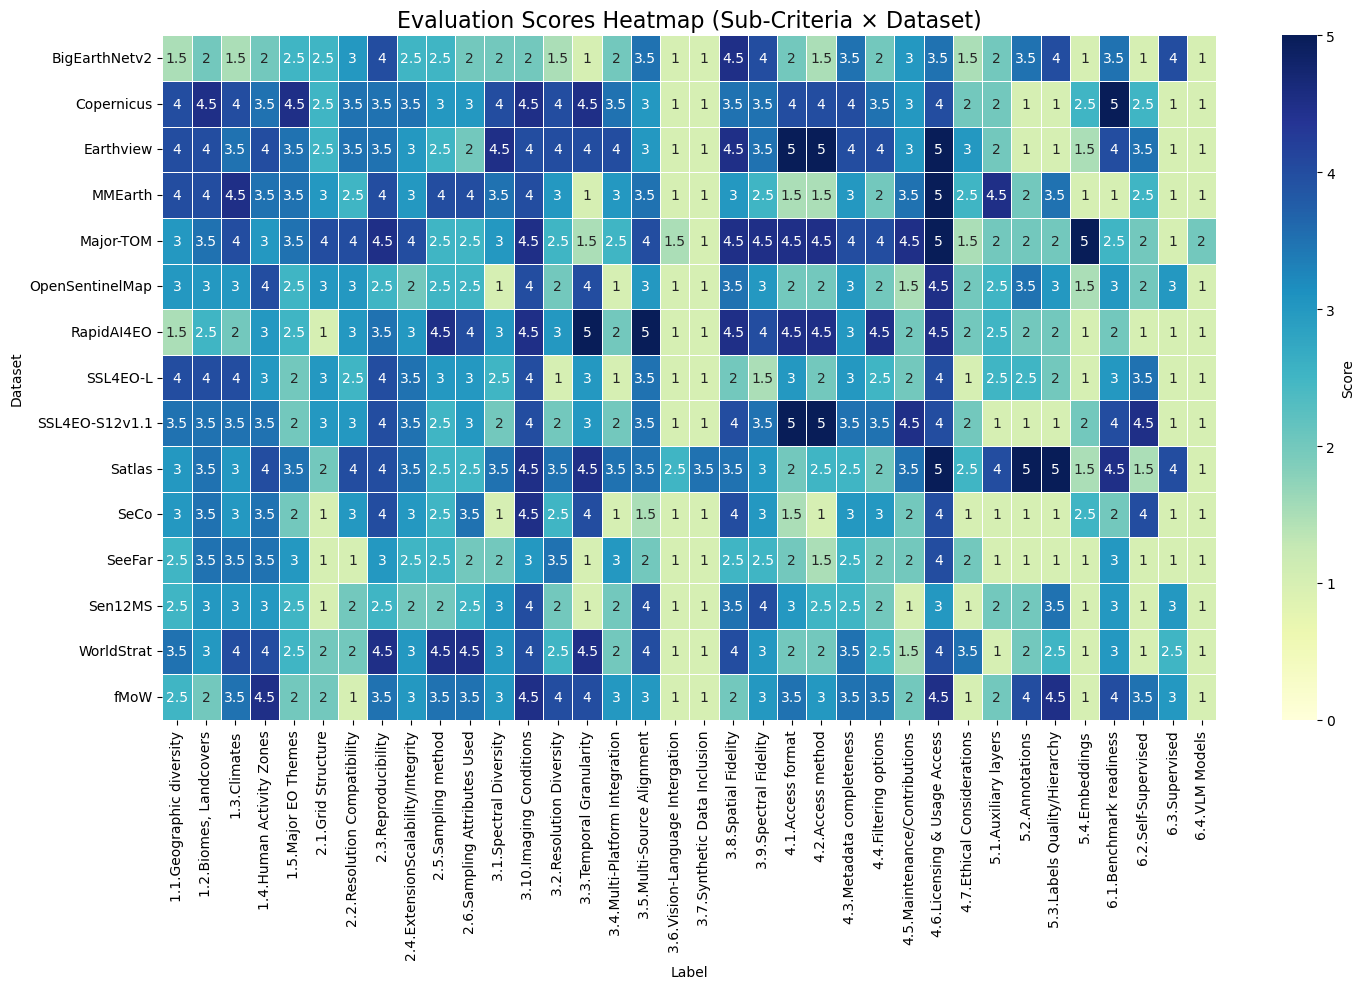

In [12]:
# Pivot the dataframe for heatmap plotting
heatmap_df = df.pivot(index="Dataset", columns="Label", values="Score")

plt.figure(figsize=(15, 10))
sns.heatmap(heatmap_df, annot=True, cmap="YlGnBu", vmin=0, vmax=5, linewidths=0.5, cbar_kws={"label": "Score"})
plt.title("Evaluation Scores Heatmap (Sub-Criteria × Dataset)", fontsize=16)
plt.tight_layout()
plt.show()


## Next Steps

- Use `.groupby()` and `.pivot()` to perform additional aggregations (e.g., by Criteria).
- Combine with external metadata (e.g., sensor specs, model links) for richer filtering.
- Fork and update the scoring file to reflect new benchmarks or datasets.

If you improve or use this notebook in other tools, feel free to contribute back